# Linear classification

## Classification problem

Classification is the problem that is rather unique for the fields of pattern recognition and machine learning. Unlike in regression, where the output is a continous variable, $y \in \mathbb{R}$, the output is now discrete, $y \in \mathcal{C}$, where the different discrete values $\mathcal{C} = \left\{c_1, c_2, \ldots, c_K \right\}$ represent $K$ different classes (e.g. "airplane", "dog").

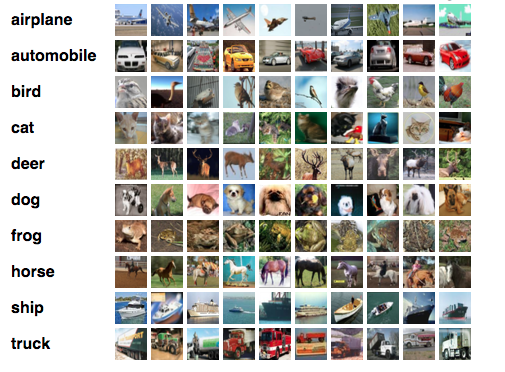

**Example 3.1** There is a ML expert orc in Middle-earth who wants to make a machine learning based trap that catches hobbits, that orcs like to eat, but not elves, that orcs are scared off. Orcs have a height sensor and they want to make a classifier that classifies entering creatures in a forest near Bree to two classes, $y=f(x)$, where $y=\left\{ hobit, elf\right\}$ and $x: \hbox{height in meters}$.  

Install the following library for nice plotting
```shell
(dataml100)$ conda istall matplotlib
```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random points for training
np.random.seed(13) # to always get the same points
N = 5
x_h = np.random.normal(1.1,0.3,N)
x_e = np.random.normal(1.9,0.4,N)
print(f'Hobbit heights: {x_h}')
print(f'Elf heights: {x_e}')
plt.plot(x_h,np.zeros([N,1]),'co', label="hobbit")
plt.plot(x_e,np.zeros([N,1]),'mo', label="elf")
plt.title('Training samples from two categories')
plt.legend()
plt.xlabel('height [m]')
plt.axis([0.5,2.5,-1.1,+1.1])
plt.show()

## Nearest neighbor classifier

One of the simplest and most intuitive classifier is the nearest neighbor classifier, or just the nearest neighbor classification rule, that computes distance to all training samples and then assigns the sample to be classified the same class the one with the smallest distance (nearest neighbor). 


## Fitting a line - Linear classifier family

We can formulate the classification problem as *line fitting*. Let's agree that hobbits are $y=-1.0$ and elves $y=+1.0$. Furthermore, we define the classification rule:
\begin{equation}
class~=~ \begin{cases}
\hbox{hobbit}, \hbox{ if } y < 0\\
\hbox{elf}, \hbox{ if } y > 0
\end{cases}
\end{equation}

In [ ]:
from numpy.linalg import inv

#
# Add y values that represent the two classes and plot
y_h = np.zeros(N)
y_h[:] = -1.0
y_e = np.zeros(N)
y_e[:] = +1.0
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
plt.title('Training samples from two classes (c1 = -1, c2 = +1)')
plt.legend()
plt.xlabel('height [m]')
plt.axis([0.5,2.5,-1.1,+1.1])
plt.grid()
plt.show()

#
# Fit and plot line

# Form the train input and output vectors  (1: hobit, 2: elf)
x_tr = np.concatenate((x_h,x_e))
y_tr = np.concatenate((y_h,y_e))

# Finding a and b using matrix operations (advanced course magic)
X = np.concatenate((np.transpose([np.ones(2*N)]),np.transpose([x_tr])), axis=1)
w_foo = np.matmul(np.transpose(X),X)
w_foo = inv(w_foo)
w = np.matmul(np.matmul(y_tr,X),w_foo)

a = w[1]
b = w[0]
y_hat_tr = a*x_tr+b
MSE = np.sum((y_tr-y_hat_tr)**2)/N

# Coodinate system
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
plt.legend()
plt.plot(x_tr,a*x_tr+b,'b-')
plt.title(f"Fitted line (a={a:.1f}, b={b:.1f}, MSE={MSE:.1f})")
plt.xlabel('height [m]')
plt.axis([0.5,2.5,-1.1,+1.1])
plt.grid()
plt.show()

In [ ]:
# Let's have new test samples and classify them
N_t =  3
x_h_test = np.random.normal(1.1,0.3,N_t) # h as hobit
x_e_test = np.random.normal(1.9,0.4,N_t) # e as elf
x_te = np.concatenate((x_h_test,x_e_test))
y_te = np.concatenate((-1*np.ones([N_t,1]),+1*np.ones([N_t,1])))

y_te_pred = a*x_te+b

corr_class = 2*N_t

for s_ind, s in enumerate(x_te):
    print(f'x = {x_te[s_ind]:1.2f}, y_gt = {y_te[s_ind]}, y_pred = {y_te_pred[s_ind]:2.2f}')
    if np.sign(y_te_pred[s_ind]) != np.sign(y_te[s_ind]):
            corr_class = corr_class-1

tot_correct = corr_class/(2*N_t)
print(f'\n Classication accuracy: {tot_correct*100:.2f}%')

## Problems in line fitting?

Let's study whether the above line fitting has some less desirable properties.

In [ ]:
# Let's make the same original points
np.random.seed(13) # to always get the same points
N = 5
x_h = np.random.normal(1.1,0.3,N)
x_e = np.random.normal(1.9,0.4,N)

y_h = np.zeros(N)
y_h[:] = -1.0
y_e = np.zeros(N)
y_e[:] = +1.0

#
# Original points
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
plt.title('Training samples from two classes (c1 = -1, c2 = +1)')
plt.legend()
plt.xlabel('height [m]')
plt.axis([0.5,2.5,-1.1,+1.1])
plt.grid()
plt.show()

# We add a giant elf (4.9m)
N_extra = 1
x_e = np.append(x_e, [4.9]) # add giant elf
y_e = np.append(y_e, +1) # add giant elf

y_h = np.zeros(N)
y_h[:] = -1.0
y_e = np.zeros(N+N_extra)
y_e[:] = +1.0

#
# New points
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
plt.title('A giant elf added to training samples')
plt.legend()
plt.xlabel('height [m]')
#plt.axis([0.5,2.5,-1.1,+1.1])
plt.grid()
plt.show()

#
# Fit and plot line

# Form the train input and output vectors  (1: hobit, 2: elf)
x_tr = np.concatenate((x_h,x_e))
y_tr = np.concatenate((y_h,y_e))

# Matrix operations
X = np.concatenate((np.transpose([np.ones(2*N+N_extra)]),np.transpose([x_tr])), axis=1)
w_foo = np.matmul(np.transpose(X),X)
w_foo = inv(w_foo)
w = np.matmul(np.matmul(y_tr,X),w_foo)

a = w[1]
b = w[0]
y_hat_tr = a*x_tr+b
MSE = np.sum((y_tr-y_hat_tr)**2)/N

# Coodinate system
plt.plot(x_h,y_h,'co', label="hobbit")
plt.plot(x_e,y_e,'mo', label="elf")
plt.legend()
plt.plot(x_tr,a*x_tr+b,'b-')
plt.title(f"Fitted line (a={a:.1f}, b={b:.1f}, MSE={MSE:.1f})")
plt.xlabel('height [m]')
#plt.axis([0.5,2.5,-1.1,+1.1])
plt.grid()
plt.show()

In [ ]:
# Let's classify the test samples again
y_te_pred = a*x_te+b

corr_class = 2*N_t

for s_ind, s in enumerate(x_te):
    print(f'x = {x_te[s_ind]:1.2f}, y_gt = {y_te[s_ind]}, y_pred = {y_te_pred[s_ind]:2.2f}')
    if np.sign(y_te_pred[s_ind]) != np.sign(y_te[s_ind]):
            corr_class = corr_class-1

tot_correct = corr_class/(2*N_t)
print(f'\n Classication accuracy: {tot_correct*100:.2f}%')

## A more suitable output for linear classification - sigmoid

However, this model has problems. Classification error is discrete and should not depend on how far on the correct or wrong side a training point is. Instead of the linear value $y=w_0+w_1x$ we want to have a Heaviside step function
\begin{equation}
  f(x) = H(x)= \begin{cases}
    1, \hbox{jos } x > 0\\
    0, \hbox{jos } x < 0
  \end{cases}
  \enspace .
\end{equation}
However, that function is mathematically difficult and thus we use its approximation,
\begin{equation}
  f(x) = logsig(x) = \frac{1}{1+e^{-x}} \enspace ,
  \label{eq:sigmoidal}
\end{equation}
called as the "sigmoid function". Now, our linear model is inside the sigmoid function as
\begin{equation}
f(x) = logsig(ax+b) = \frac{1}{1+e^{-(w_0+w_1x)}} \enspace .
\end{equation}


In [ ]:
# Coodinate system
plt.xlabel('x')
plt.ylabel('y')
#plt.axis([0.5,4.0,-1.1,+1.1])

# Plot logsig
N = 101
x = np.linspace(-3.0,+3.0,N)
plt.plot(x, 1/(1+np.exp(-x)),'c-', label="logsig(x)")
plt.plot(x, 1/(1+np.exp(-2*x)),'m-', label="logsig(2x)")
plt.plot(x, 1/(1+np.exp(-5*x)),'y-', label="logsig(5x)")
plt.plot(x, 1/(1+np.exp(-5*x+5)),'k-', label="logsig(5x-5))")
plt.title('Logistic function')
plt.legend()
plt.show()

How to find optimal a and b when we use the sigmoid function is another story!

## References

C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapter 4.
